In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


             2023   Ownership
1     2309.521620    381696.0
2     8367.775731     38109.0
4    52976.808378   2892107.0
5    13730.514709   4451944.0
6     8715.765336     48266.0
..            ...         ...
163  81695.187071  52888108.0
164   2496.107758    512332.0
167   6253.161613   6041450.0
168   1369.129365    220509.0
169   1592.416574    238138.0

[124 rows x 2 columns]
Corr es:  -0.0024380902189847
La correlación es negativa débil. El PIB pér-cápita no es relevante en la adopción de cripto


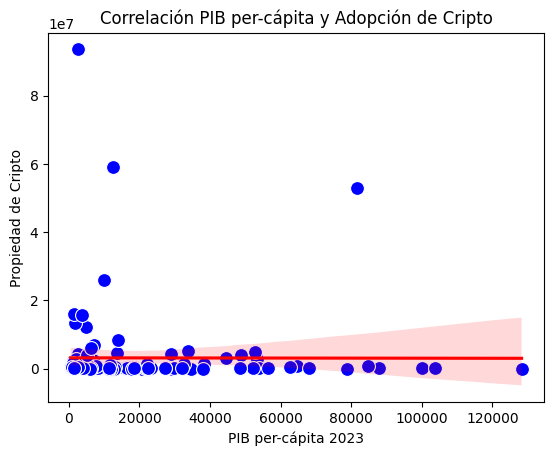

In [41]:
ruta_index = "./DataSocial/cripto_index.csv"
ruta_pib = "./DataSocial/cripto_pib.csv"

df_pib = pd.read_csv(ruta_pib)
df_index = pd.read_csv(ruta_index,sep = ';',thousands = ',')

df_pib_2023 = df_pib[['Country Name',"2023"]]
df_index_2023 = df_index[['Country','Ownership']]

df_mixed = pd.merge(
    df_pib_2023,
    df_index_2023,
    left_on="Country Name",
    right_on="Country",
    how="inner"
)

df_merged = df_mixed[['Country','2023','Ownership']]

df_merged = df_merged.select_dtypes(include=['float'])
df_merged = df_merged.dropna()
#print(df_pib)
#print(df_index)

print(df_merged)

correlacion_pib_adopcion = df_merged['Ownership'].corr(df_merged['2023'])
print('Corr es: ',correlacion_pib_adopcion)

if correlacion_pib_adopcion== 1:
    print("La correlación es perfecta positiva. El PIB pér-capita y la adopción de Cripto aumentan en medidas iguales ")
elif correlacion_pib_adopcion > 0.5:
    print("La correlación es positiva fuerte. Se podría afirmar que EL PIB-pér cápita y la adopción de cripto sí aumenta en medida conforme, entre más PIB más cripto")
elif correlacion_pib_adopcion > 0:
    print("La correlación es positiva débil. El PIB pér-cápita no es relevante en la adopción de cripto")
elif correlacion_pib_adopcion == 0:
    print("No hay correlación")
elif correlacion_pib_adopcion < -0.5:
    print("La correlación es negativa fuerte. El PIB pér-cápita es relevante en la adopción de cripto entre menos más adopción")
else:
    print("La correlación es negativa débil. El PIB pér-cápita no es relevante en la adopción de cripto")


sns.scatterplot(data=df_merged, x='2023', y='Ownership', color='blue', s=100)
sns.regplot(data=df_merged, x='2023', y='Ownership', scatter=False, color='red')
plt.title('Correlación PIB per-cápita y Adopción de Cripto')
plt.xlabel('PIB per-cápita 2023')
plt.ylabel('Propiedad de Cripto')
plt.show()




